World Happiness Report

Importing Requriments:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Now, We set the parameters to control the general style of plot:

In [2]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['figure.facecolor'] = '#FFE5B4'      # Peetch color value...

Loading Dataset:

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')

In [4]:
data.head()   # print the first 5 rows...

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [6]:
data_columns = ['Country','Region','Happiness Score','Economy (GDP per Capita)','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']

In [7]:
data = data[data_columns].copy()

In [8]:
happy_df = data.rename({'Country':'country','Region':'region','Happiness Score':'happiness_score','Economy (GDP per Capita)':'economy_gdp_per_capita','Health (Life Expectancy)':'health_life_expectancy','Freedom':'freedom','Trust (Government Corruption)':'trust_government_corruption','Generosity':'generosity','Dystopia Residual':'dystopia_residual'})

In [9]:
happy_df.head()

,Country,Region,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,7.587,1.39651,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,7.561,1.30232,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,7.527,1.32548,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,7.522,1.45900,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,7.427,1.32629,0.90563,0.63297,0.32957,0.45811,2.45176


In [10]:
# Checking the null value...

happy_df.isnull().sum()

Country                          0
Region                           0
Happiness Score                  0
Economy (GDP per Capita)         0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [11]:
happy_df.dtypes

Country                           object
Region                            object
Happiness Score                  float64
Economy (GDP per Capita)         float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [12]:
happy_df.shape

(158, 9)

It observed in Dataset the rows is 158 and 10 columns

Data Analysis:

In [13]:
# Getting some statiscal measure about the dataset..

happy_df.describe()

,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.846137,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.403121,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.545808,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.910245,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,1.158448,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,1.690420,1.025250,0.669730,0.551910,0.795880,3.602140


<AxesSubplot:>

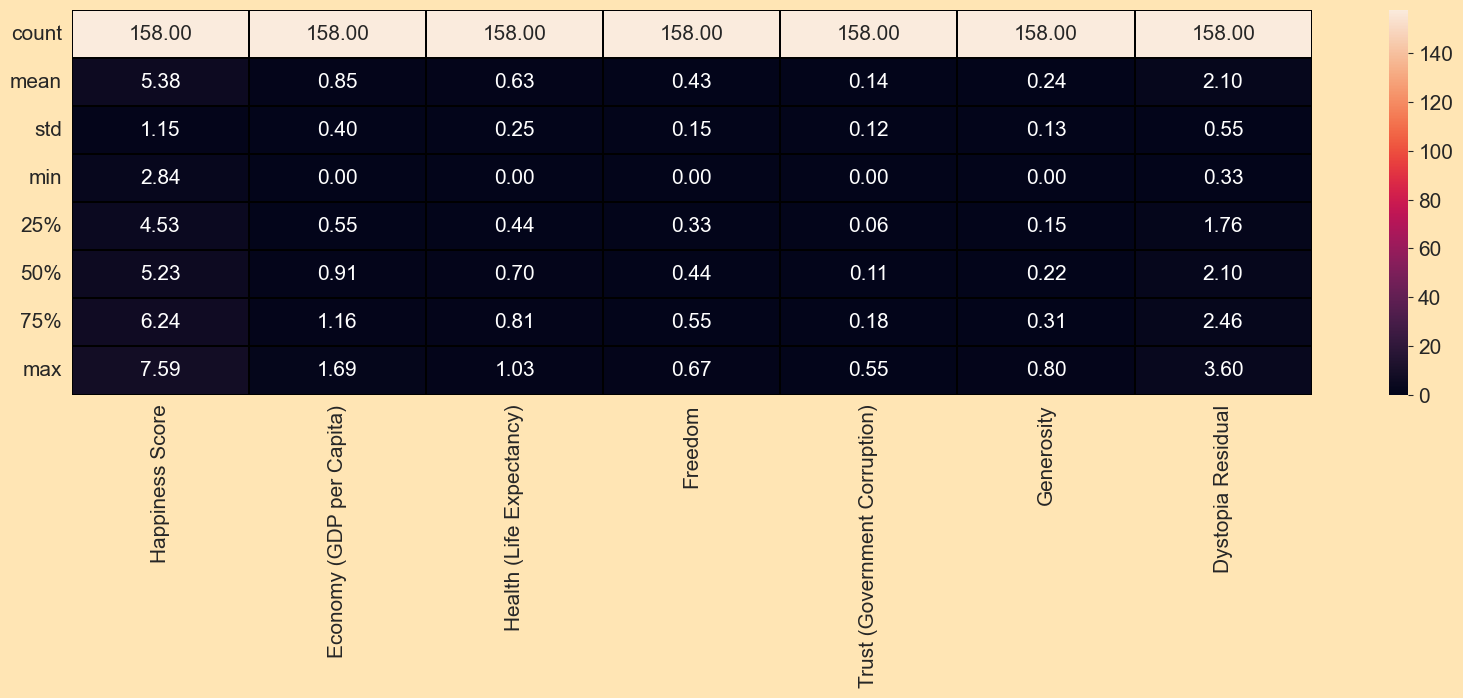

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,5))
sns.heatmap(happy_df.describe(), annot=True, linewidth=0.1, linecolor='black', fmt='0.2f')

Data Visualization:

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'GDP per Capita')

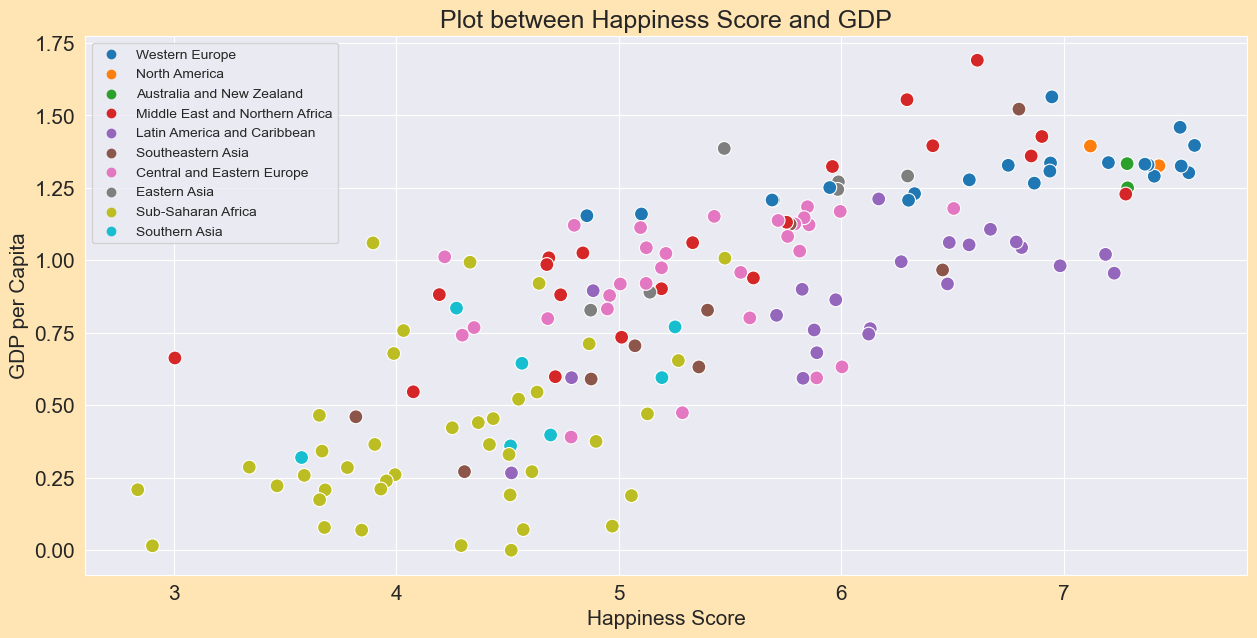

In [16]:
# Create a plot between Happiness Score and GDP...

plt.rcParams['figure.figsize'] = (15,7)
plt.title('Plot between Happiness Score and GDP')
sns.scatterplot(x = happy_df['Happiness Score'], y = happy_df['Economy (GDP per Capita)'], hue = happy_df['Region'], s=100);

plt.legend(loc = 'upper left', fontsize = '10')
plt.xlabel('Happiness Score')
plt.ylabel('GDP per Capita')

In [17]:
# it shows the all GDP region group wise...

GDP = happy_df.groupby('Region')['Economy (GDP per Capita)' ].sum()
GDP

Region
Australia and New Zealand           2.58376
Central and Eastern Europe         27.33071
Eastern Asia                        6.91068
Latin America and Caribbean        19.28994
Middle East and Northern Africa    21.33947
North America                       2.72080
Southeastern Asia                   7.10149
Southern Asia                       3.92340
Sub-Saharan Africa                 15.21892
Western Europe                     27.27051
Name: Economy (GDP per Capita), dtype: float64

Text(0, 0.5, '')

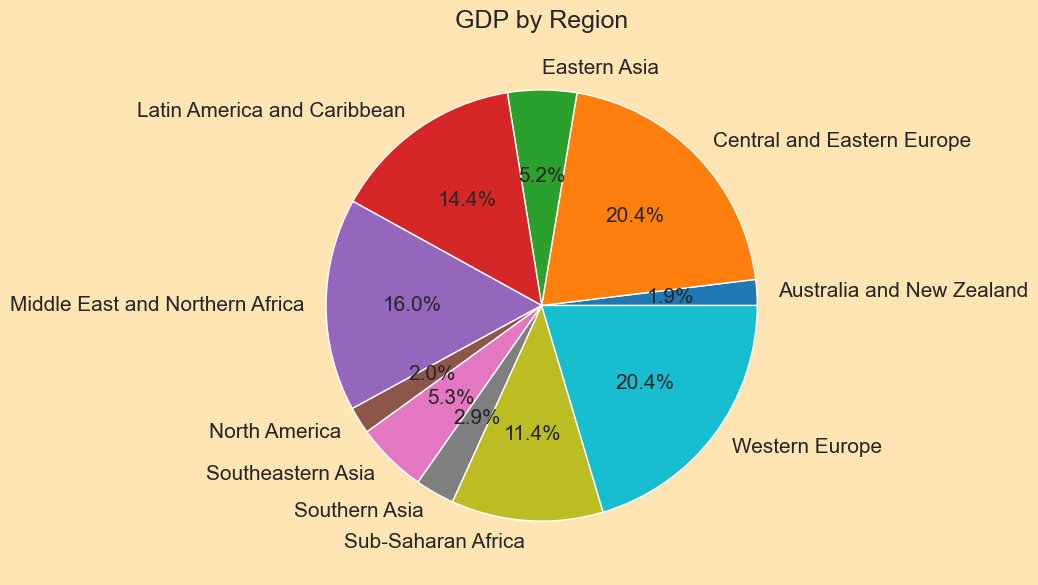

In [18]:
# making the pie plot for all GDP region...

GDP.plot.pie(autopct = '%1.1f%%')     # Passing format
plt.title('GDP by Region')
plt.ylabel('')

In [19]:
# Count of Total Countries in region..

total_country = happy_df.groupby('Region')[['Country']].count()
print(total_country)

                                 Country
Region                                  
Australia and New Zealand              2
Central and Eastern Europe            29
Eastern Asia                           6
Latin America and Caribbean           22
Middle East and Northern Africa       20
North America                          2
Southeastern Asia                      9
Southern Asia                          7
Sub-Saharan Africa                    40
Western Europe                        21


Correlation Map:

<AxesSubplot:>

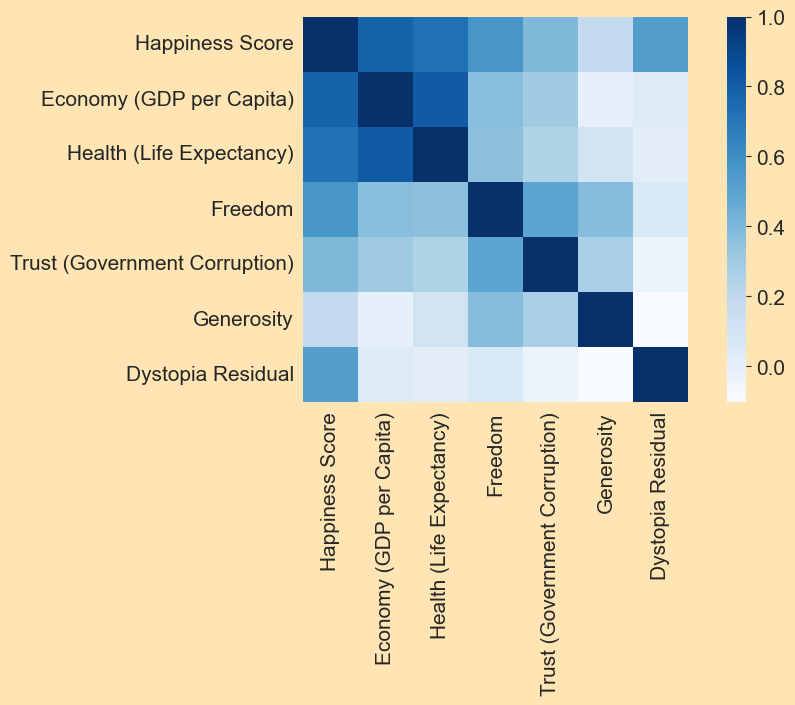

In [20]:
# Correlation Map...

cor = happy_df.corr(method = 'pearson')
f, ax = plt.subplots(figsize = (10,5))
sns.heatmap(cor, mask = np.zeros_like(cor, dtype=np.bool),
            cmap = 'Blues', square = True, ax=ax)

In [21]:
#  Corruption in Region..

corruption = happy_df.groupby('Region')[['Trust (Government Corruption)']].mean()
corruption

,Trust (Government Corruption)
Region,
Australia and New Zealand,0.392795
Central and Eastern Europe,0.086674
Eastern Asia,0.127695
Latin America and Caribbean,0.117172
Middle East and Northern Africa,0.181702
North America,0.244235
Southeastern Asia,0.151276
Southern Asia,0.102536
Sub-Saharan Africa,0.123878


<BarContainer object of 10 artists>

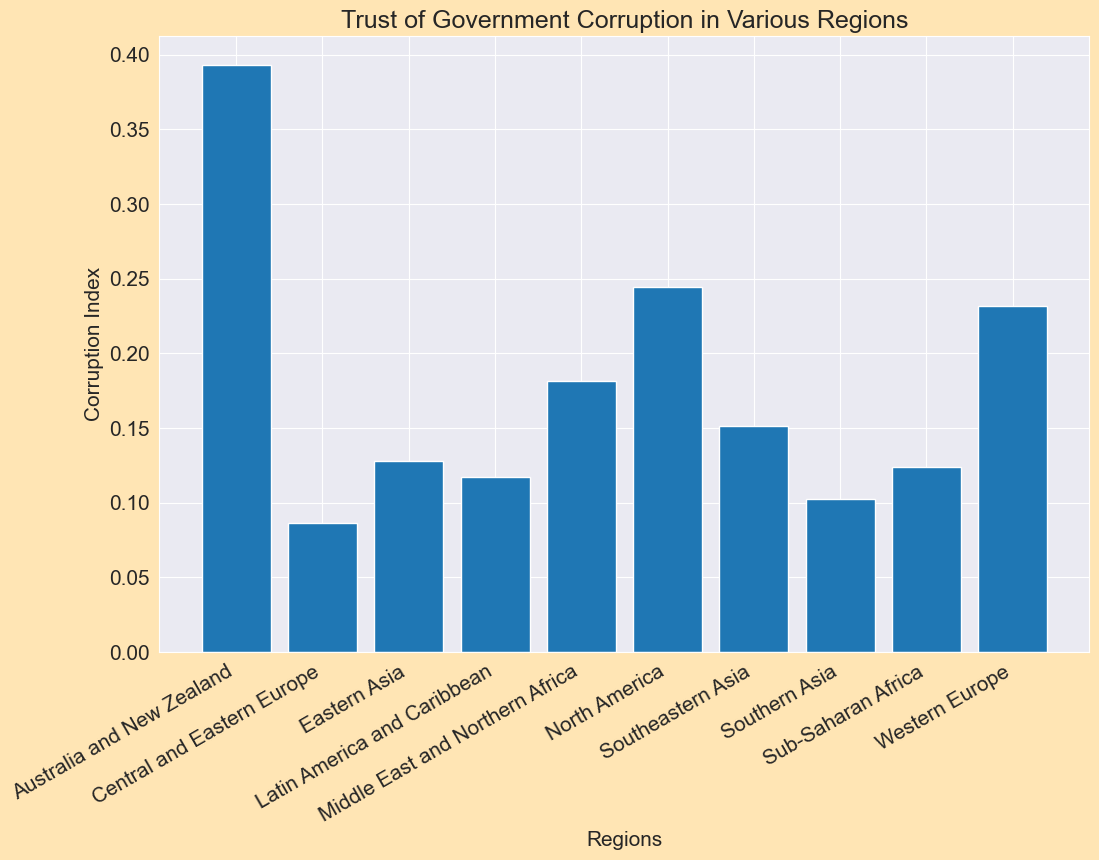

In [25]:
# making barplot for finding the corruption..

plt.rcParams['figure.figsize'] = (12,8)
plt.title('Trust of Government Corruption in Various Regions')
plt.xlabel('Regions', fontsize = 15)
plt.ylabel('Corruption Index', fontsize = 15)
plt.xticks(rotation = 30, ha='right')
plt.bar(corruption.index, corruption['Trust (Government Corruption)'])

In [26]:
# top 10 happiest country and top 10 bottom country..

top_10 = happy_df.head(10)
bottom_10 = happy_df.tail(10)

Text(832.0858585858584, 0.5, 'Health (Life Expectancy)')

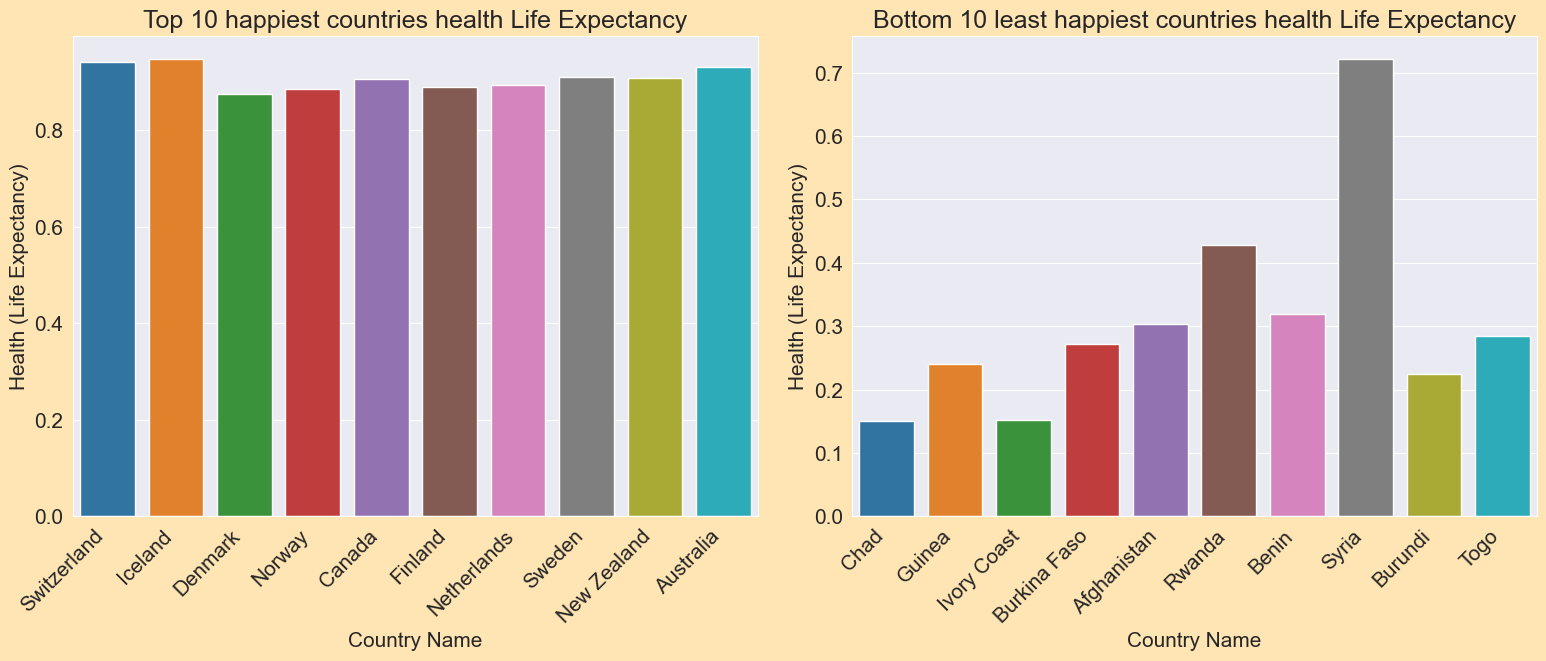

In [27]:
fig, axes = plt.subplots(1,2, figsize = (16,6))
plt.tight_layout(pad = 2)

xlabels = top_10.Country
axes[0].set_title('Top 10 happiest countries health Life Expectancy')
axes[0].set_xticklabels(xlabels, rotation=45, ha='right')
sns.barplot(x = top_10['Country'], y = top_10['Health (Life Expectancy)'], ax = axes[0])
axes[0].set_xlabel('Country Name')
axes[0].set_ylabel('Health (Life Expectancy)')


xlabels = bottom_10.Country
axes[1].set_title('Bottom 10 least happiest countries health Life Expectancy')
axes[1].set_xticklabels(xlabels, rotation=45, ha='right')
sns.barplot(x = bottom_10['Country'], y = bottom_10['Health (Life Expectancy)'], ax = axes[1])
axes[1].set_xlabel('Country Name')
axes[1].set_ylabel('Health (Life Expectancy)')

Text(0, 0.5, 'Happiness Score')

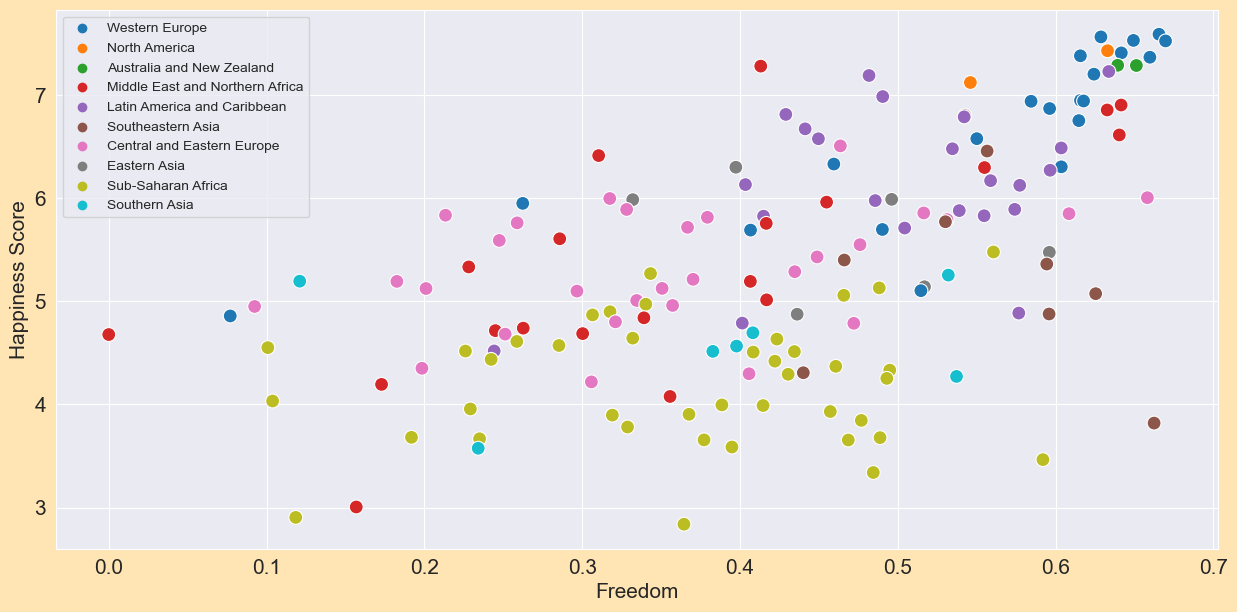

In [28]:
# making the freedom plot for life choice...

plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x = happy_df['Freedom'], y = happy_df['Happiness Score'], hue = happy_df['Region'], s=100)

plt.legend(loc = 'upper left', fontsize = '10')
plt.xlabel('Freedom')
plt.ylabel('Happiness Score')

<BarContainer object of 10 artists>

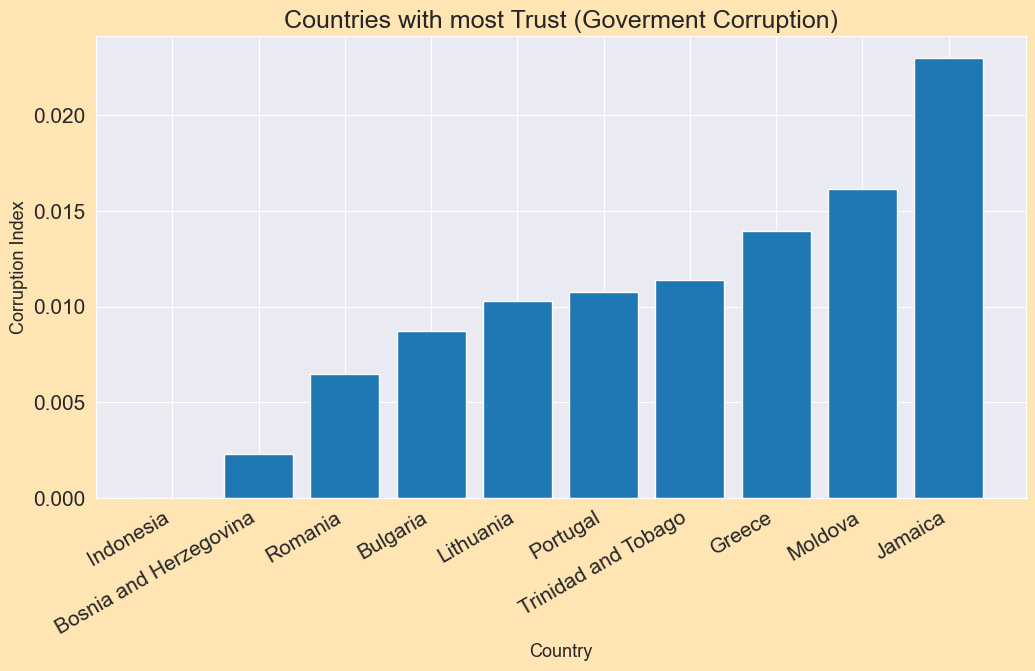

In [29]:
# find out the top 10 corruption country...

country = happy_df.sort_values(by = 'Trust (Government Corruption)').head(10)
plt.rcParams['figure.figsize'] = (12,6)
plt.title('Countries with most Trust (Goverment Corruption)')
plt.xlabel('Country', fontsize = 13)
plt.ylabel('Corruption Index', fontsize = 13)
plt.xticks(rotation = 30, ha = 'right')
plt.bar(country['Country'], country['Trust (Government Corruption)'])

Text(0, 0.5, 'Corruption')

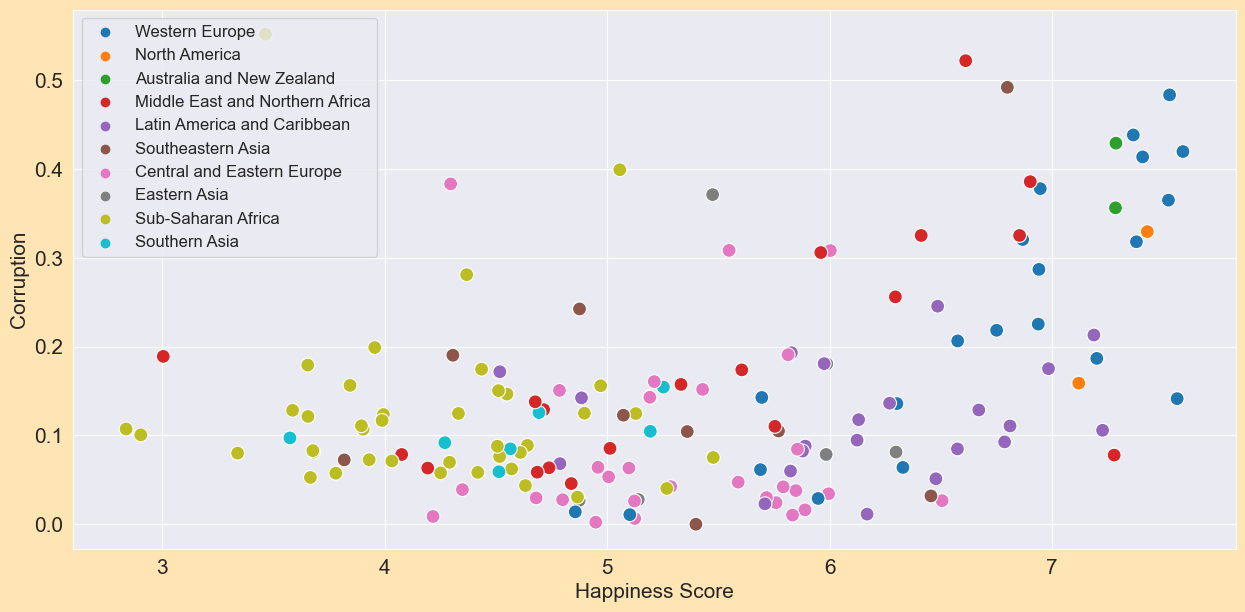

In [31]:
# corruption vs happiness score

plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x = happy_df['Happiness Score'], y = happy_df['Trust (Government Corruption)'], hue = happy_df['Region'], s=100)

plt.legend(loc = 'upper left', fontsize = '12')
plt.xlabel('Happiness Score')
plt.ylabel('Corruption')